In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import model

In [2]:

np.random.seed(0)

# data loader

In [3]:
# Training .csv  --> first column is label , 1~748 is image value , image size =28*28
# test .csv  --> 0~747 is image value , image size =28*28
#submit your prediction to kaggle

In [4]:
train_load=np.loadtxt("./data/train.csv",dtype=np.int,delimiter=',')
test_data=np.loadtxt("./data/test_nolabel.csv",dtype=np.int,delimiter=',')


train_data=train_load[:,1:]
train_label=train_load[:,0]


In [5]:
print("shape of train_data: {}".format(train_data.shape))
print("shape of train_label: {}".format(train_label.shape))
print("shape of test_data: {}".format(test_data.shape))


shape of train_data: (112800, 784)
shape of train_label: (112800,)
shape of test_data: (18800, 784)


In [6]:
train_image_num = train_data.shape[0]
test_image_num = test_data.shape[0]
print("train_image_num  is : {}".format(train_image_num))
print("test_image_num   is : {}".format(test_image_num))

train_image_num  is : 112800
test_image_num   is : 18800


## Show the data

In [7]:
test_data_show = test_data.reshape(test_image_num, 28,28)
#train_data_show = train_data.reshape(train_image_num, 28,28)

In [8]:
test_data_show.shape

(18800, 28, 28)

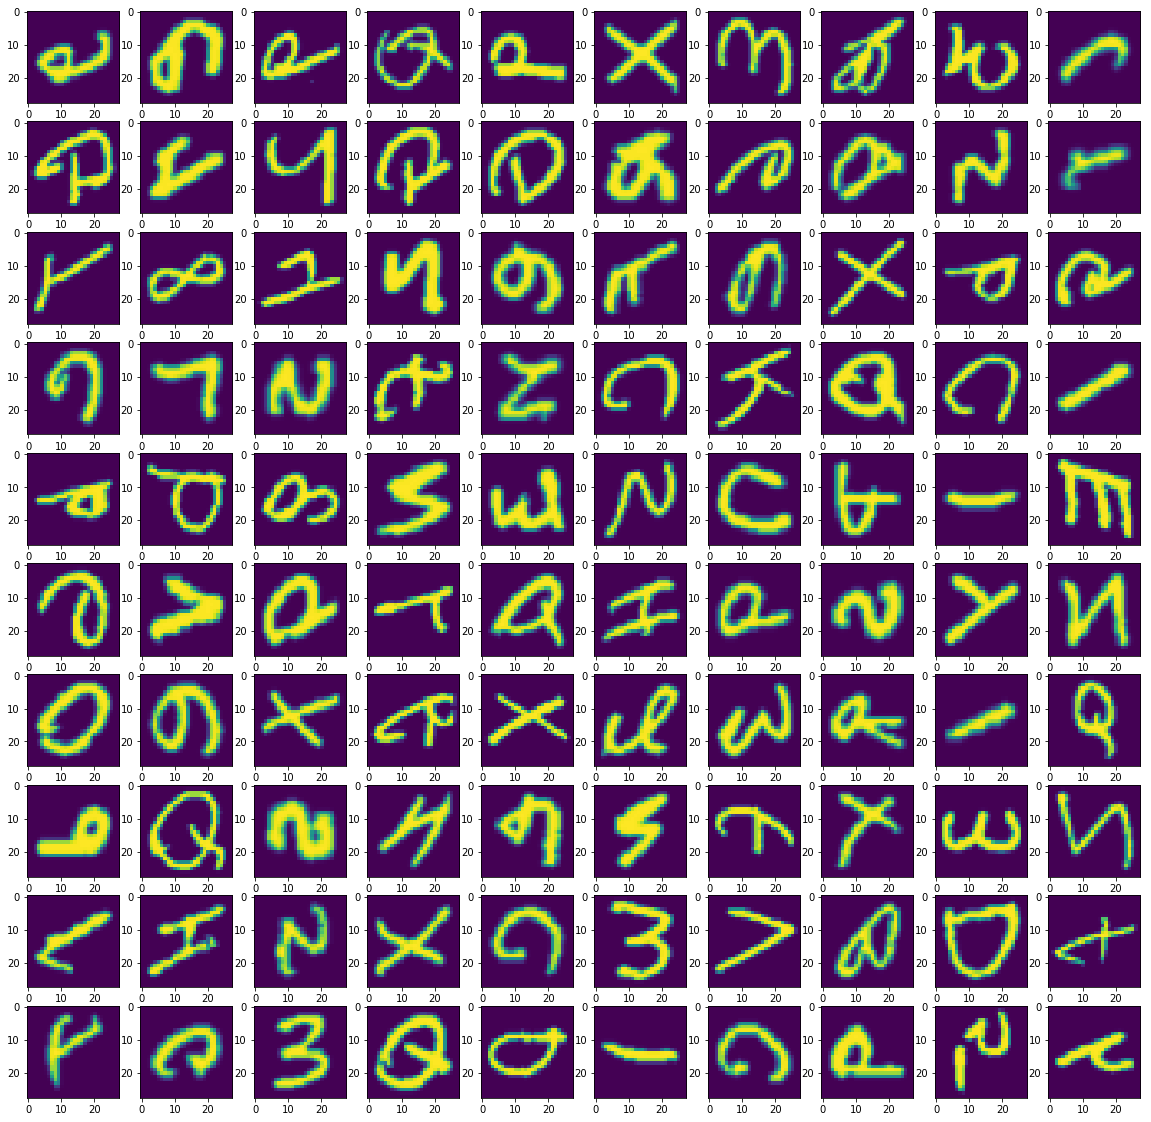

In [9]:
plt.figure(figsize=(20, 20))
for index in range(100):
    image = test_data_show[index]
    plt.subplot(10, 10, index+1)
    plt.imshow(image)
plt.show()

#set validation dataset

In [10]:
val_image_num=8000

# Convert the training  labels to one hot 

In [11]:
label_temp = np.zeros((train_image_num, 47), dtype = np.float32)
for i in range(train_image_num):
    label_temp[i][train_label[i]] = 1
train_label_onehot = np.copy(label_temp)
print("One-hot training labels shape:",train_label_onehot.shape)

One-hot training labels shape: (112800, 47)


## Hyperparameters

In [12]:
EPOCH = 50
Batch_size = 250
Learning_rate = 5e-6


## Training

In [ ]:
net = model.Network()

train_batch_num = (train_image_num  -  val_image_num  )//Batch_size
val_batch_num = (val_image_num)//Batch_size


for epoch in range(1, EPOCH+1):
    train_hit = 0
    val_hit = 0
    total_train_loss = 0
    total_val_loss = 0
    for it in range(train_batch_num):
        pred, train_loss = net.forward(train_data[it*Batch_size:(it+1)*Batch_size], train_label_onehot[it*Batch_size:(it+1)*Batch_size])
        pred_index = np.argmax(pred, axis=1)
        train_hit += (pred_index==train_label[it*Batch_size:(it+1)*Batch_size]).sum()
        total_train_loss += train_loss
        
        net.backward()
        net.update(Learning_rate)
        
    for titt in range(val_batch_num):
        tit=train_batch_num+titt
        pred, val_loss = net.forward(train_data[tit*Batch_size:(tit+1)*Batch_size], train_label_onehot[tit*Batch_size:(tit+1)*Batch_size])
        pred_index = np.argmax(pred, axis=1)
        val_hit += (pred_index==train_label[tit*Batch_size:(tit+1)*Batch_size]).sum()
        total_val_loss += val_loss
        
    print('Epoch:%3d'%epoch, '|Train Loss:%8.4f'%(total_train_loss/train_batch_num), '|Train Acc:%3.4f'%(train_hit/(train_image_num-val_image_num)*100.0)
          , '|Val Loss:%8.4f'%(total_val_loss/val_batch_num), '|Val Acc:%3.4f'%(val_hit/val_image_num*100.0))

Epoch:  1 |Train Loss:  2.5845 |Train Acc:36.6412 |Val Loss:  1.5629 |Val Acc:56.7250
Epoch:  2 |Train Loss:  1.3872 |Train Acc:61.2128 |Val Loss:  1.2665 |Val Acc:63.7500
Epoch:  3 |Train Loss:  1.1890 |Train Acc:66.4179 |Val Loss:  1.1188 |Val Acc:67.6375
Epoch:  4 |Train Loss:  1.0611 |Train Acc:69.6202 |Val Loss:  1.0088 |Val Acc:70.0875
Epoch:  5 |Train Loss:  0.9615 |Train Acc:72.0687 |Val Loss:  0.9239 |Val Acc:72.2625
Epoch:  6 |Train Loss:  0.8826 |Train Acc:74.1212 |Val Loss:  0.8574 |Val Acc:74.0375
Epoch:  7 |Train Loss:  0.8196 |Train Acc:75.7128 |Val Loss:  0.8045 |Val Acc:75.3750
Epoch:  8 |Train Loss:  0.7684 |Train Acc:76.9933 |Val Loss:  0.7619 |Val Acc:76.5500
Epoch:  9 |Train Loss:  0.7259 |Train Acc:78.0391 |Val Loss:  0.7269 |Val Acc:77.3875
Epoch: 10 |Train Loss:  0.6899 |Train Acc:78.9637 |Val Loss:  0.6981 |Val Acc:78.3750
Epoch: 11 |Train Loss:  0.6590 |Train Acc:79.7786 |Val Loss:  0.6738 |Val Acc:79.0625
Epoch: 12 |Train Loss:  0.6321 |Train Acc:80.4714 |Val

# your test prediction on test data

#upload csv to kaggle and get your score

In [ ]:
test_pred_list = []

for tit in range(test_image_num//Batch_size):
    pred, test_loss = net.forward(test_data[tit*Batch_size:(tit+1)*Batch_size], train_label_onehot[tit*Batch_size:(tit+1)*Batch_size])
    pred_index = np.argmax(pred, axis=1)
    test_pred_list += pred_index.tolist()
    

print('Dump file...')
df = pd.DataFrame(test_pred_list, columns=["Category"])
df.to_csv('test-predict.csv', index=True, index_label="Id")